Optimal
Total energy: 345.47052686284803
Meeting location: (1.0, 1.0)
0.

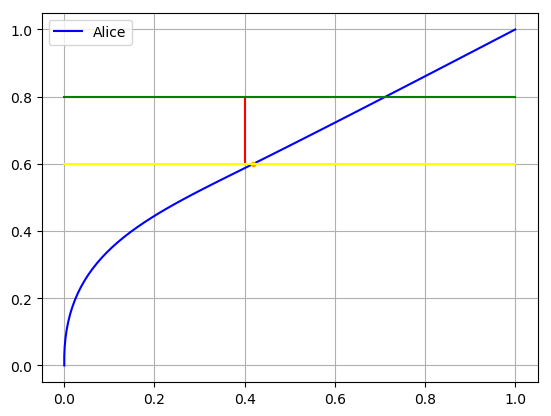

4190831572479731
0.6000000099981815


In [14]:
using JuMP, Gurobi, PyPlot, Ipopt

# Define model, variables, constraints, objective
m = Model(solver=IpoptSolver(print_level=0))

time = 60
start = [0, 0]
finish = [1, 1]
lower_bound = 0.6
upper_bound = 0.8
time_step = 36

@variable(m, x_A[1:2, 1:time])
@variable(m, v_A[1:2, 1:time])
@variable(m, u_A[1:2, 1:time])

# x index on east/west, y index on north/south
@constraint(m, x_A[:, 1] .== start) # Alice's initial position
@constraint(m, v_A[:, 1] .== [0, 100]) # Alice's initial velocity 

#@constraint(m, x_A[1, 10] >= 0.1) # Alice's initial position
#@constraint(m, x_A[1, 10] <= 0.1) # Alice's initial position

# Our practice constraints
for t in 34:36
    #@constraint(m, (x_A[2, t] >= upper_bound))
    @constraint(m, (x_A[2, t] <= lower_bound))
end


# Dynamic equations
for t in 1:time-1
    @constraint(m, x_A[:, t+1] .== x_A[:, t] + (1/3600)*v_A[:, t]) # Alice's position    
    @constraint(m, v_A[:, t+1] .== v_A[:, t] + u_A[:, t]) # Alice's velocity
end

@constraint(m, x_A[:, time] .== finish) # final location



#@NLconstraint(m, distance, sqrt((x_A[1,: +1] - x_A[1,:])^2 + (x_A[2,t+1] - x_A[2,t])^2) )
@objective(m, Min, sum(u_A.^2)) # minimize total energy

# Solve
status = solve(m)
println(status)

# Output
x_A = getvalue(x_A)
println("Total energy: ", getobjectivevalue(m))
println("Meeting location: (", x_A[1,60],", ",x_A[2,60],")")

box_y = range(lower_bound, stop=upper_bound, length=100)
box_x = 0*box_y .+ 0.4
upper_y = range(upper_bound, stop=upper_bound, length=100)
upper_x = LinRange(0, 1, 100)
lower_y = range(lower_bound, stop=lower_bound, length=100)
lower_x = LinRange(0, 1, 100)

# Graph
plot(x_A[1, :], x_A[2, :], color="blue", label="Alice")
plot(x_A[1, time_step], x_A[2, time_step], ".", color="orange")
plot(box_x, box_y, color="red")
plot(upper_x, upper_y, color="green")
plot(lower_x, lower_y, color="yellow")

grid("on")
legend()
println(x_A[1,time_step])
println(x_A[2,time_step])
;

In [102]:
0.012058188408084808
0.04601438030208982
;